In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_excel(r"/content/data.xlsx")

In [ ]:
data.dtypes

MEMBERSHIP_NUMBER         object
MEMBERSHIP_TERM_YEARS      int64
ANNUAL_FEES              float64
MEMBER_MARITAL_STATUS     object
MEMBER_GENDER             object
MEMBER_ANNUAL_INCOME     float64
MEMBER_OCCUPATION_CD     float64
MEMBERSHIP_PACKAGE        object
MEMBER_AGE_AT_ISSUE        int64
ADDITIONAL_MEMBERS         int64
PAYMENT_MODE              object
AGENT_CODE                object
MEMBERSHIP_STATUS         object
START_DATE (YYYYMMDD)      int64
END_DATE  (YYYYMMDD)     float64
dtype: object

In [6]:
# Assuming 'data' is your DataFrame
columns_to_drop = ['MEMBERSHIP_NUMBER', 'MEMBER_MARITAL_STATUS', 'MEMBER_GENDER', 'MEMBER_OCCUPATION_CD', 'ADDITIONAL_MEMBERS', 'AGENT_CODE', 'START_DATE (YYYYMMDD)', 'END_DATE  (YYYYMMDD)']

data = data.drop(columns=columns_to_drop, axis=1)

In [57]:
# Map 'PAYMENT_MODE' to numeric values
payment_mode_mapping = {
    'ANNUAL': 0,
    'QUARTERLY': 1,
    'MONTHLY': 2,
    'SEMI-ANNUAL': 3,
    'SINGLE-PREMIUM': 4
}

data['PAYMENT_MODE'] = data['PAYMENT_MODE'].map(payment_mode_mapping)

# Map 'MEMBERSHIP_PACKAGE' to numeric values
membership_package_mapping = {
    'TYPE-A': 0,
    'TYPE-B': 1
}

data['MEMBERSHIP_PACKAGE'] = data['MEMBERSHIP_PACKAGE'].map(membership_package_mapping)


In [67]:
X = data.drop(columns=["MEMBERSHIP_STATUS"])  # Exclude the target variable
y = data["MEMBERSHIP_STATUS"]

In [70]:
X.isnull().sum()

MEMBERSHIP_TERM_YEARS        0
ANNUAL_FEES                  0
MEMBER_ANNUAL_INCOME         0
MEMBERSHIP_PACKAGE       10362
MEMBER_AGE_AT_ISSUE          0
PAYMENT_MODE             10362
dtype: int64

In [66]:
X[X['MEMBERSHIP_STATUS']!= "INFORCE"]

,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_ANNUAL_INCOME,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,MEMBERSHIP_STATUS
7,12,120000.00,3.600000e+06,1,28,CANCELLED
12,12,100000.00,1.451100e+06,1,42,CANCELLED
17,12,200000.00,2.520000e+06,1,35,CANCELLED
18,12,200000.00,8.880000e+06,1,29,CANCELLED
19,12,100000.80,5.040000e+06,1,28,CANCELLED
...,...,...,...,...,...,...
9491,17,123707.64,9.999960e+05,0,42,CANCELLED
9529,17,101921.28,1.451100e+06,0,62,CANCELLED
9664,17,103091.88,3.000000e+05,0,37,CANCELLED
9834,22,123707.88,9.999960e+05,0,49,CANCELLED


In [55]:
missing_values = data.isnull().sum()
print(missing_values)

MEMBERSHIP_TERM_YEARS        0
ANNUAL_FEES                  0
MEMBER_ANNUAL_INCOME         0
MEMBERSHIP_PACKAGE           0
MEMBER_AGE_AT_ISSUE          0
PAYMENT_MODE             10362
MEMBERSHIP_STATUS            0
dtype: int64


In [56]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean (you can choose a different strategy)
imputer = SimpleImputer(strategy='mean')
data['MEMBER_ANNUAL_INCOME'] = imputer.fit_transform(data[['MEMBER_ANNUAL_INCOME']])

In [58]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [13]:
X = data.drop("PAYMENT_MODE", axis=1)
y = data["PAYMENT_MODE"]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Fitting a Random Forest Classifier (you can choose another algorithm)
model = RandomForestClassifier()
model.fit(X_train, y_train)

ValueError: ignored

In [60]:
from sklearn.impute import SimpleImputer

# Impute missing values in X using mean strategy (you can choose a different strategy)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

ValueError: ignored

In [17]:
model = RandomForestClassifier()
model.fit(X_train_imputed, y_train)

RandomForestClassifier()

In [18]:
# Scoring the model with the test data
y_pred = model.predict(X_test_imputed)
y_prob = model.predict_proba(X_test_imputed)[:, 1]

In [19]:
# Calculate AUC
roc_auc = roc_auc_score(y_test, y_prob)


In [20]:
# Display AUC and plot ROC Curve
print(f"AUC: {roc_auc}")
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

AUC: 0.6666069089536665


ValueError: ignored

In [21]:
# Encode 'CANCELLED' as 1 and 'INFORCE' as 0
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

In [22]:
# Scoring the model with the test data
y_prob = model.predict_proba(X_test_imputed)[:, 1]

In [23]:
# Calculate AUC
roc_auc = roc_auc_score(y_test_binary, y_prob)


AUC: 0.6666069089536665


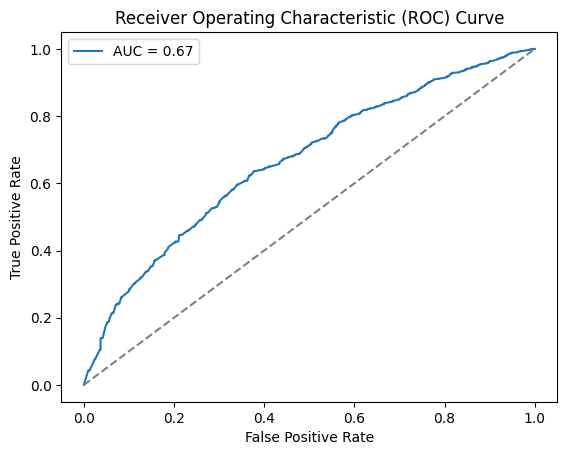

In [24]:
# Display AUC and plot ROC Curve
print(f"AUC: {roc_auc}")
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [25]:
# Display Confusion Matrix
y_pred_binary = model.predict(X_test_imputed)
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

TypeError: ignored

In [26]:
# Convert model predictions to binary format
y_pred_binary = (model.predict(X_test_imputed) == 'CANCELLED').astype(int)


In [27]:
# Calculate AUC
roc_auc = roc_auc_score(y_test_binary, y_prob)

AUC: 0.6666069089536665


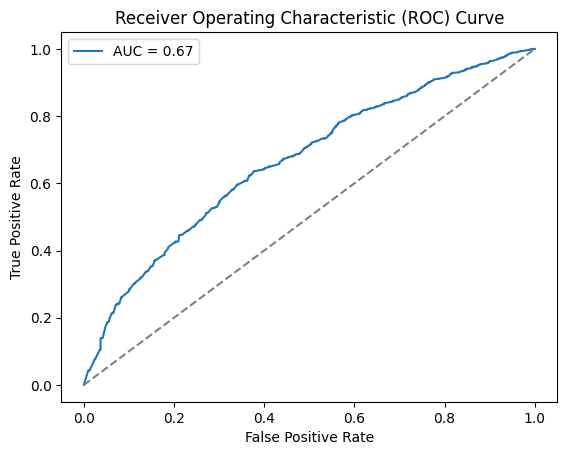

In [28]:
# Display AUC and plot ROC Curve
print(f"AUC: {roc_auc}")
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [29]:
# Display Confusion Matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 396  224]
 [1196  257]]


In [30]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [31]:
rf_model = RandomForestClassifier()

In [32]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)


In [33]:
# Fit the model with the training data
grid_search.fit(X_train_imputed, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [34]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [35]:
# Get the best model
best_rf_model = grid_search.best_estimator_

In [36]:
# Scoring the model with the test data
y_pred = best_rf_model.predict(X_test_imputed)
y_prob = best_rf_model.predict_proba(X_test_imputed)[:, 1]

In [37]:
# Calculate AUC
roc_auc = roc_auc_score(y_test_binary, y_prob)


AUC: 0.6982133738871745


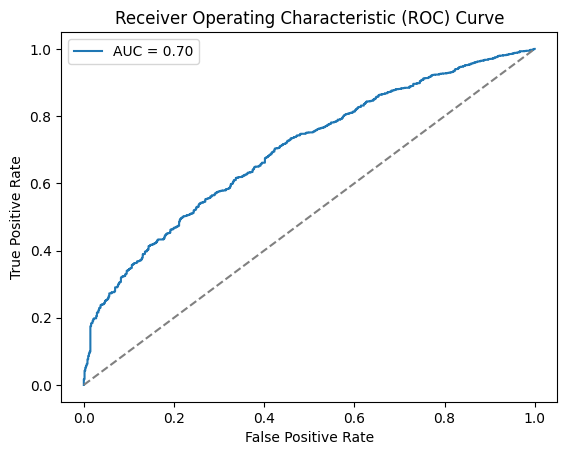

In [38]:
# Display AUC and plot ROC Curve
print(f"AUC: {roc_auc}")
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [39]:
# Display Confusion Matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

TypeError: ignored

In [52]:
# Calculate accuracy
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / sum(sum(conf_matrix))

print(f"Accuracy: {accuracy:.1%}")

Accuracy: 31.5%


In [41]:
# Calculate precision
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])

print(f"Precision: {precision:.2%}")

Precision: 53.43%


In [43]:

recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])

# Calculate F1-Score
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Recall: {recall:.2%}")
print(f"F1-Score: {f1_score:.2%}")

Recall: 17.69%
F1-Score: 26.58%


In [44]:
# Create a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

NameError: ignored

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


In [62]:
# Fit the model using cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

NameError: ignored

In [63]:
y_pred = pipeline.predict(X_test)

NameError: ignored

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer